In [1]:
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
import h5py
import pickle
from synthesizer.particle import Stars, Gas, Galaxy


In [2]:
# set style
plt.style.use('../../matplotlibrc.txt')

Initialise stars object

In [3]:
import pickle

snap_z = 2.00202813925285
id = '145492'

galaxy = pickle.load(open(f'data/galaxy_{id}.pck','rb'))

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_60434/314651429.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


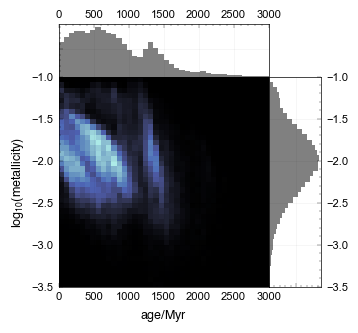

In [4]:
metallicities = galaxy.stars.metallicities
ages = galaxy.stars.ages
initial_masses = galaxy.stars._initial_masses

cmap = cmr.sapphire
age_range = [0., 3000.]
log10metallicity_range = [-3.5, -1.]
nbins = 40

fig = plt.figure(figsize=(3.5, 3.5))

bottom = 0.15
height = 0.6
hsize = 0.15
left = 0.15
width = 0.6

ax = fig.add_axes((left, bottom, width, height))
axx = fig.add_axes((left, bottom+height, width, hsize))
axy = fig.add_axes((left+width, bottom, hsize, height))

hist, xedges, yedges = np.histogram2d(ages.to('Myr').value, 
                                      np.log10(metallicities), 
                                      bins=[nbins,nbins], 
                                      range=[age_range, log10metallicity_range],
                                      weights=initial_masses)

axx.hist(ages.to('Myr').value, bins=nbins, range=age_range, weights=initial_masses,color='0.5')
axy.hist(np.log10(metallicities), bins=nbins, range=log10metallicity_range, weights=initial_masses, orientation='horizontal',color='0.5')

ax.imshow(hist.T, 
           origin='lower', 
           interpolation='nearest', 
           extent=[*age_range, *log10metallicity_range],
           aspect='auto',
           cmap=cmap)


axx.set_xlim(age_range)
axx.set_yticklabels([])
axx.xaxis.set_ticks_position('top')

axy.set_ylim(log10metallicity_range)
axy.set_xticklabels([])
axy.yaxis.set_ticks_position('right')

ax.set_xlabel(r'$\rm age/Myr$')
ax.set_ylabel(r'$\rm log_{10}(metallicity)$')

fig.savefig('figs/tng-age_metallicity.pdf')
fig.show()